In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
%matplotlib inline

# v=sns.get_dataset_names ()

x=sns.load_dataset('titanic')
print(x)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [9]:
x.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [12]:
x.shape

(891, 15)

In [13]:
x.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [14]:
x.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: xlabel='survived', ylabel='count'>

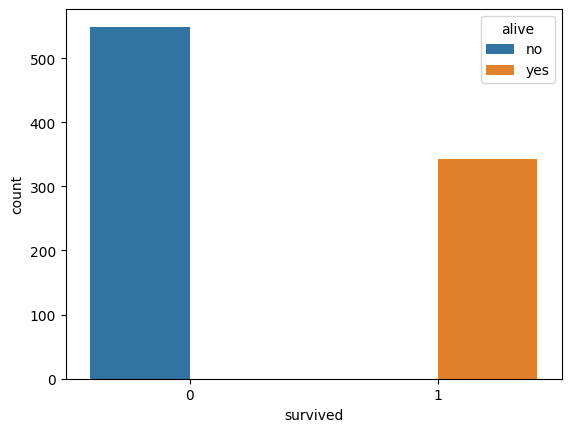

In [34]:
sns.countplot(data=x,x=x["survived"],hue='alive' )


<Axes: xlabel='class', ylabel='count'>

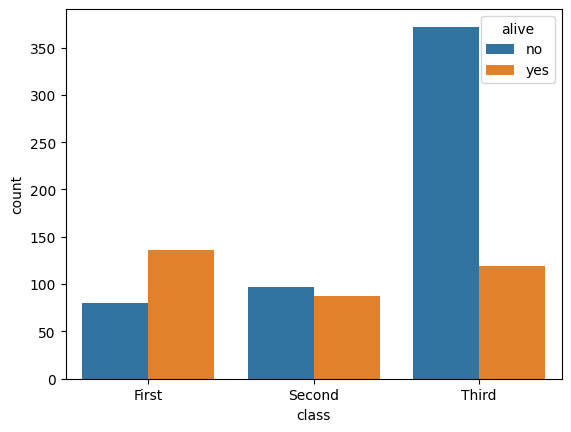

In [33]:
sns.countplot(data=x,x=x["class"], hue="alive" )


<Axes: xlabel='sex', ylabel='count'>

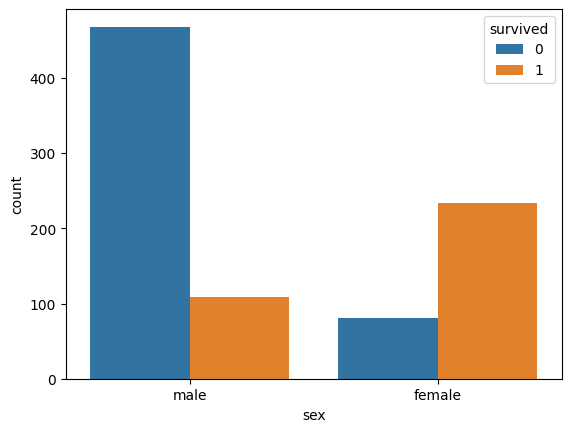

In [51]:

sns.countplot(data=x,x='sex',hue='survived',)

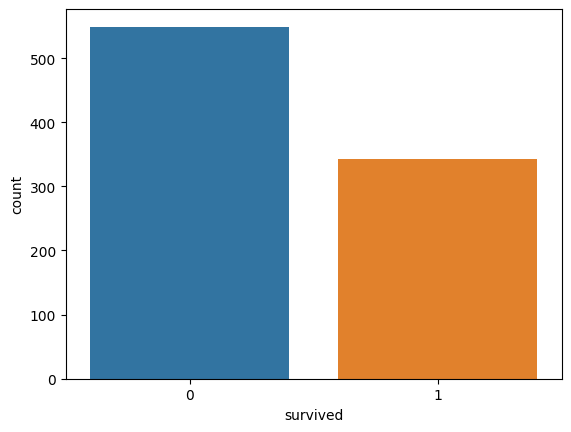

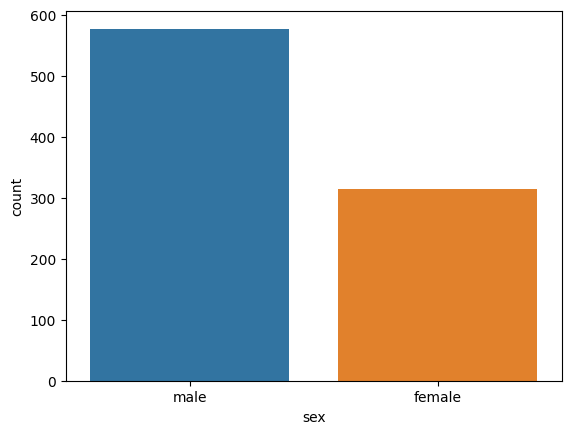

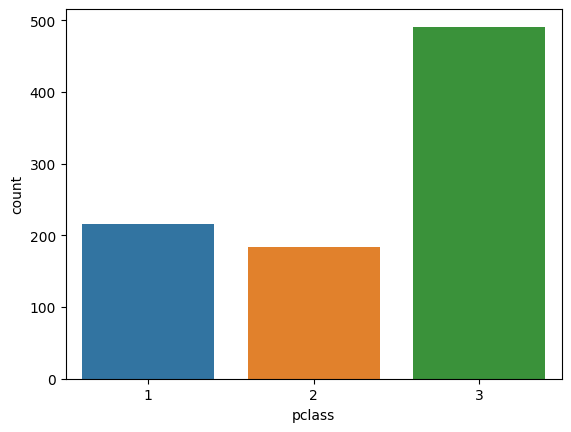

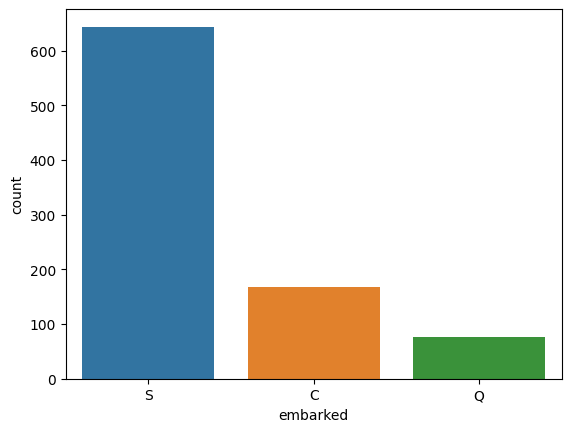

In [56]:
def count_plot(columns):
    sns.countplot(data=x,x=columns)
    plt.show()
list = ["survived","sex","pclass","embarked"]
for i in list:
    count_plot(i)
    

Text(0, 0.5, 'count')

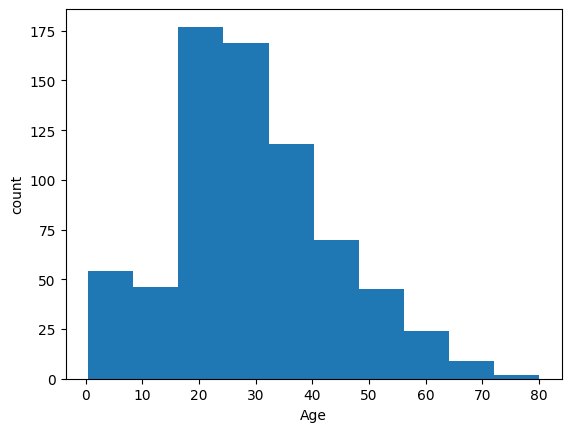

In [63]:
plt.hist(x['age'])
plt.xlabel('Age')
plt.ylabel('count')

In [67]:
x.groupby('sex').agg({'survived':'count'})

,survived
sex,
female,314
male,577


In [69]:
p=x.groupby('age').agg({'survived':'sum'})

,survived
age,
0.42,1
0.67,1
0.75,2
0.83,2
0.92,1
...,...
70.00,0
70.50,0
71.00,0


In [87]:
x.drop([ 'fare',
       'embarked', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],axis=1,inplace=True)

KeyError: "['fare', 'embarked', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone'] not found in axis"

In [76]:
x.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [82]:
x.dropna(inplace=True)

In [83]:
x.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
dtype: int64

In [88]:
x.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
dtype: object

In [90]:
x.shape

(182, 6)

In [91]:
x.head()

,survived,pclass,sex,age,sibsp,parch
1,1,1,female,38.0,1,0
3,1,1,female,35.0,1,0
6,0,1,male,54.0,0,0
10,1,3,female,4.0,1,1
11,1,1,female,58.0,0,0


In [93]:
x['sex']=x['sex'].replace({'male':1,'female':0})

In [94]:
x.head()

,survived,pclass,sex,age,sibsp,parch
1,1,1,0,38.0,1,0
3,1,1,0,35.0,1,0
6,0,1,1,54.0,0,0
10,1,3,0,4.0,1,1
11,1,1,0,58.0,0,0


In [120]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


train=x.drop('survived',axis=1)
label=x['survived']
label

1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: survived, Length: 182, dtype: int64

In [104]:
x_train,x_test,y_train,y_test=train_test_split(train,label,test_size=0.2,random_state=1)
y_train

857    1
782    0
581    1
587    1
765    1
      ..
659    0
681    1
356    1
698    0
218    1
Name: survived, Length: 145, dtype: int64

In [105]:
logg=LogisticRegression()
logg.fit(x_train,y_train)

LogisticRegression()

In [110]:
predicted=logg.predict(x_test)

In [108]:
logg.score(x_test,y_test)

0.6756756756756757

In [109]:
logg.score(x_train,y_train)


0.8

In [114]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,predicted)

array([[ 5,  7],
       [ 5, 20]], dtype=int64)

In [116]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.50      0.42      0.45        12
           1       0.74      0.80      0.77        25

    accuracy                           0.68        37
   macro avg       0.62      0.61      0.61        37
weighted avg       0.66      0.68      0.67        37

